## Image classification

Yixin Huangfu

This assignment is about trains a neural network model to classify images of clothing.

In this assignment we are performing a classification task.
- elaborate on the strategy that you use for design and optimization
- when you decide to stop the training
- how you add the Tensorboard to this assignment?

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


## Import the Fashion MNIST dataset

We use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—
Import and load the Fashion MNIST data directly from keras (it is part of from keras.datasets ):

In [73]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [74]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [75]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [76]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [77]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [78]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

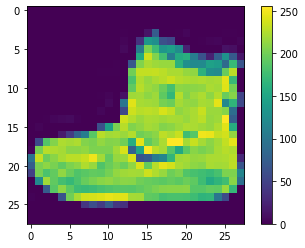

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [79]:
train_images = train_images / 255

test_images = test_images / 255

## Build the model



### Set up the layers

The basic building block of a neural network is the *layer*. The first layer in this network should convert the image to a vector (784 pixels) you may find the following layer useful: tf.keras.layers.Flatten and tf.keras.layers.Dense as well as softmax layer 10 clsses).

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])



### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [81]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.



### Feed the model

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [82]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4884 - accuracy: 0.8250
Epoch 2/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3642 - accuracy: 0.8658
Epoch 3/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3296 - accuracy: 0.8782
Epoch 4/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3077 - accuracy: 0.8866
Epoch 5/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2900 - accuracy: 0.8923
Epoch 6/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2745 - accuracy: 0.8974
Epoch 7/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2651 - accuracy: 0.9008
Epoch 8/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2520 - accuracy: 0.9049
Epoch 9/20
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2424 - accuracy: 0.9081
Epoch 10/20
60

As the model trains, the loss and accuracy metrics are displayed.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.3656 - accuracy: 0.8899

Test accuracy: 0.8899


Elaborate on the overfitting/ underfitting and how to fix it:

**Answer**

The original training result gives training accuracy of 93%, while test accuracy is 89%. This is an overfitting issue. With dataset being fixed, there are two ways to overcome this.

- Use regularization
- Use a better model

I tried to add l2 regularization to the Dense layer, but it doesn't help much. However, I successfully reduced the overfitting with another technique called Dropout, as shown by ```model2``` below. Now the train acc is 90.7% vs test acc 88.6%, difference is 2%.

Using Convolutional Neural Network with Dropout also help reduce overfitting. The ```model3``` below shows train acc 92.6% vs test acc 91.4%

In [89]:
# Adding regularization and dropout to reduce overfitting
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=30)

test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.6304 - accuracy: 0.7941
Epoch 2/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4602 - accuracy: 0.8464
Epoch 3/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4162 - accuracy: 0.8604
Epoch 4/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3899 - accuracy: 0.8648
Epoch 5/30
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3721 - accuracy: 0.8724
Epoch 6/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3591 - accuracy: 0.8766
Epoch 7/30
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3520 - accuracy: 0.8805
Epoch 8/30
60000/60000 [==============================] - 4s 59us/sample - loss: 0.3415 - accuracy: 0.8822
Epoch 9/30
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3357 - accuracy: 0.8846
Epoch 10/30
60

In [94]:
# Using CNN and Dropout
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model3.fit(train_images.reshape(train_images.shape + (1,)), train_labels, epochs=20)


test_loss, test_acc = model3.evaluate(test_images.reshape(test_images.shape + (1,)), test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5424 - accuracy: 0.8023
Epoch 2/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3820 - accuracy: 0.8592
Epoch 3/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3397 - accuracy: 0.8752
Epoch 4/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3131 - accuracy: 0.8840
Epoch 5/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2904 - accuracy: 0.8926
Epoch 6/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2762 - accuracy: 0.8967s - loss: 0.2762 - accu
Epoch 7/20
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2619 - accuracy: 0.9028
Epoch 8/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2520 - accuracy: 0.9067
Epoch 9/20
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2423 - accuracy

### Make predictions

With the model trained, you can use it to make predictions about some images.

In [36]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [37]:
predictions[0]

array([5.1144025e-07, 2.2921041e-09, 2.6876382e-06, 1.0987911e-12,
       2.7849557e-08, 5.1741297e-03, 8.5812991e-07, 1.5629863e-02,
       4.9265689e-04, 9.7869933e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [38]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [39]:
test_labels[0]

9

In [40]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [41]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [42]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.6265282e-05 4.2805381e-11 9.9573094e-01 1.9248487e-09 1.5190736e-03
  3.6040825e-17 2.6936575e-03 1.4191970e-24 1.2967760e-09 1.8266137e-24]]


In [44]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

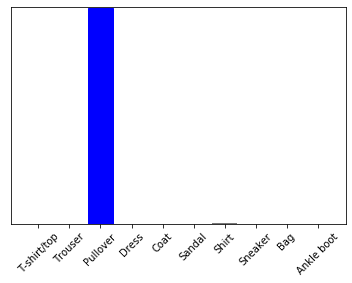

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)